# under- sampling and over-sampling For Imbalanced Dataset

In [2]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df_train = pd.read_csv("~/Downloads/porto-seguro-safe-driver-prediction/train.csv")
df_train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


# 1.Random Undersampling

It involves removing random values from the class with high no of instances until both class have similar no
of instances.

Random under-sampling:
1    6216
0    6216
Name: target, dtype: int64


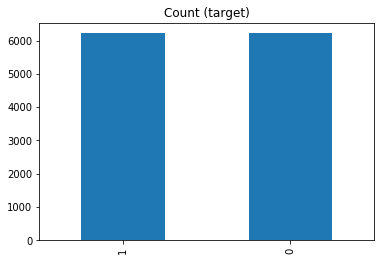

In [17]:
# Class count
count_class_0, count_class_1 = df_train.target.value_counts()

# Divide by class
df_class_0 = df_train[df_train['target'] == 0]
df_class_1 = df_train[df_train['target'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.target.value_counts())

df_test_under.target.value_counts().plot(kind='bar', title='Count (target)');

In [18]:
labels = df_train.columns[2:]
X = df_test_under[labels]
y = df_test_under['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:"+str(int(accuracy * 100.0))+"%")
print classification_report(y_test, y_pred) 

Accuracy:59%
              precision    recall  f1-score   support

           0       0.60      0.64      0.62      1275
           1       0.59      0.56      0.57      1212

   micro avg       0.60      0.60      0.60      2487
   macro avg       0.60      0.60      0.60      2487
weighted avg       0.60      0.60      0.60      2487



Although the result are not ver good but atleast we are able to get some accuracy with other class as well and are not classifying all minority class as majority class.

Confusion matrix:
[[812 463]
 [538 674]]


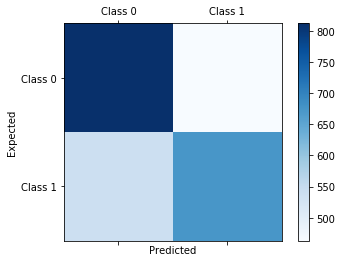

In [19]:
result = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(result)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(result, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# 2.Random oversampling

It involves inserting copy of random values from class with low instances until no of instances in both classes
becomes similar.

Random over-sampling:
1    573518
0    573518
Name: target, dtype: int64


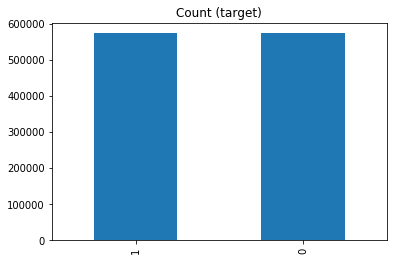

In [17]:
# randomly picking count_class_0 no of values from df_class_1 and adding to final class
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.target.value_counts())

df_test_over.target.value_counts().plot(kind='bar', title='Count (target)')

In [20]:
labels = df_train.columns[2:]
X = df_test_under[labels]
y = df_test_under['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:"+str(int(accuracy * 100.0))+"%")
print classification_report(y_test, y_pred)

Accuracy:58%
              precision    recall  f1-score   support

           0       0.60      0.59      0.59      4397
           1       0.58      0.59      0.59      4281

   micro avg       0.59      0.59      0.59      8678
   macro avg       0.59      0.59      0.59      8678
weighted avg       0.59      0.59      0.59      8678



Confusion matrix:
[[2581 1816]
 [1743 2538]]


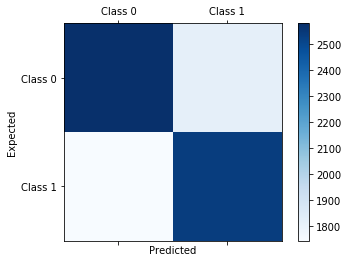

In [22]:
result = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(result)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(result, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()